In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

In [14]:
# Load CIFAR-10 dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [15]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)
(10000, 32, 32, 3) (10000, 1)


In [16]:
# 2) Convert to float32 and scale pixels to [0,1]
X_train = X_train.astype("float32") / 255.0
X_valid = X_valid.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

In [18]:
y_train, y_valid, y_test = y_train.flatten(),y_valid.flatten() ,y_test.flatten()

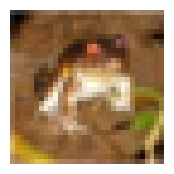

In [29]:
plt.figure(figsize=(2, 2))  # Smaller size
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [20]:
# 3) Build the CNN with Functional API
inputs = layers.Input(shape=(32, 32, 3), name="input_image")

# # Normalize inside the model
# x = layers.Rescaling(1./255, name="rescale")(inputs)
x = inputs

# Convolutional feature extractor
x = layers.Conv2D(32, (3,3), activation="relu", name="conv1")(x)
x = layers.MaxPooling2D((2,2), name="pool1")(x)
x = layers.Conv2D(64, (3,3), activation="relu", name="conv2")(x)
x = layers.MaxPooling2D((2,2), name="pool2")(x)
x = layers.Conv2D(64, (3,3), activation="relu", name="conv3")(x)

# Classification head
x = layers.Flatten(name="flatten")(x)
x = layers.Dense(64, activation="relu", name="dense1")(x)
x = layers.Dropout(0.5, name="dropout")(x)
outputs = layers.Dense(10, activation="softmax", name="output_probs")(x)

model = Model(inputs, outputs, name="fashion_mnist_cnn")



In [21]:
# 4) Compile
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "fashion_mnist_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 pool1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)        

In [22]:
# 5) Train
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_valid, y_valid)
)

Epoch 1/10
1407/1407 [==============================] - 20s 13ms/step - loss: 1.7678 - accuracy: 0.3440 - val_loss: 1.3580 - val_accuracy: 0.5138
Epoch 2/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4164 - accuracy: 0.4895 - val_loss: 1.1817 - val_accuracy: 0.5822
Epoch 3/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.2778 - accuracy: 0.5493 - val_loss: 1.0722 - val_accuracy: 0.6302
Epoch 4/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.1722 - accuracy: 0.5882 - val_loss: 1.0093 - val_accuracy: 0.6496
Epoch 5/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.1120 - accuracy: 0.6135 - val_loss: 0.9612 - val_accuracy: 0.6688
Epoch 6/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.0485 - accuracy: 0.6351 - val_loss: 0.9370 - val_accuracy: 0.6758
Epoch 7/10
1407/1407 [==============================] - 19s 14ms/step - loss: 0.9969 - accuracy: 0.6541 - val_loss: 0.9454 -

In [23]:
# 6) Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 4ms/step - loss: 0.9020 - accuracy: 0.6950

Test accuracy: 0.6950


In [24]:
# 7) Predict on a few samples
sample_images = X_test[:5]
sample_labels = y_test[:5]
pred_probs = model.predict(sample_images)
print(pred_probs.round(2))
pred_labels = np.argmax(pred_probs, axis=1)

for i, (pred, true) in enumerate(zip(pred_labels, sample_labels)):
    print(f"Sample {i}: Predicted={pred}, True={true}")

1/1 [==============================] - 0s 100ms/step
[[0.03 0.01 0.04 0.41 0.01 0.25 0.02 0.05 0.14 0.03]
 [0.02 0.01 0.   0.   0.   0.   0.   0.   0.97 0.  ]
 [0.19 0.25 0.01 0.01 0.01 0.   0.   0.   0.46 0.07]
 [0.53 0.02 0.02 0.   0.   0.   0.   0.   0.43 0.  ]
 [0.   0.   0.06 0.03 0.39 0.01 0.52 0.   0.   0.  ]]
Sample 0: Predicted=3, True=3
Sample 1: Predicted=8, True=8
Sample 2: Predicted=8, True=8
Sample 3: Predicted=0, True=0
Sample 4: Predicted=6, True=6


In [25]:
y_pred = pred_probs.argmax(axis=-1)
y_pred

array([3, 8, 8, 0, 6], dtype=int64)

In [26]:

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]
np.array(class_names)[y_pred]

array(['cat', 'ship', 'ship', 'airplane', 'frog'], dtype='<U10')

In [27]:
y_new = y_test[:5]
y_new

array([3, 8, 8, 0, 6], dtype=uint8)

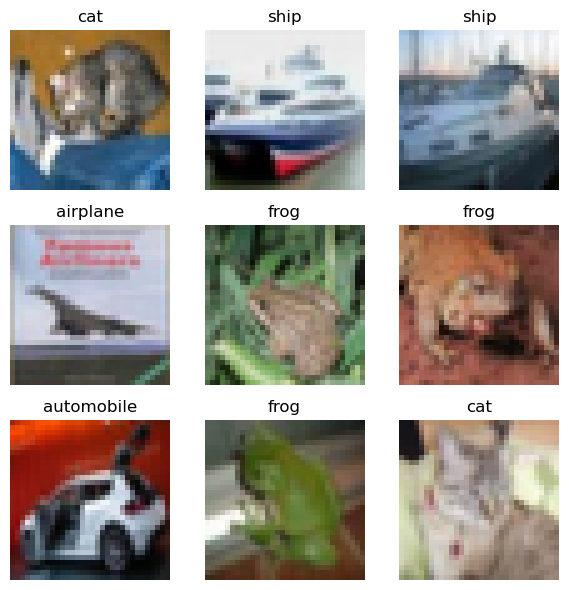

In [33]:
# Plot a 3×3 grid of test images with their true labels
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])              # X_test shape: (n,32,32,3)
    plt.title(class_names[y_test[i]])  # y_test shape: (n,)
    plt.axis('off')
plt.tight_layout()
plt.show()

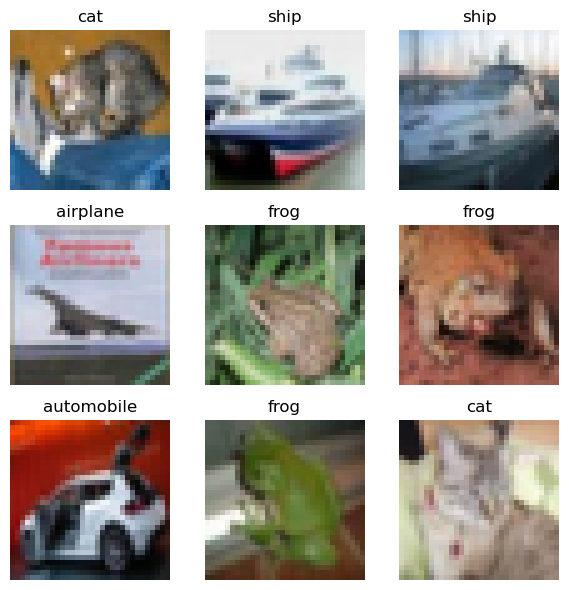

In [38]:
fig, axes = plt.subplots(3,3, figsize=(6,6), dpi=100)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i], interpolation='nearest')
    ax.set_title(class_names[y_test[i]])
    ax.axis('off')
plt.tight_layout()
plt.show()

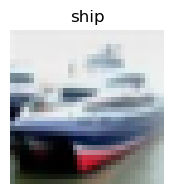

In [42]:
i = 1
plt.figure(figsize=(2, 2), dpi = 100)  # Smaller size
plt.imshow(X_test[i], interpolation="none")
plt.title(class_names[y_test[i]])
plt.axis('off')
plt.show()